In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

1.Basic data cleaning and exploration

In [388]:
data =pd.read_csv("E:\Projects\Automatic_Image_enhacement\delhivery.csv")
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [389]:
data.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9.0,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18.0,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27.0,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36.0,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39.0,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9.0,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,18.0,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,27.0,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,36.0,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,False,43.0,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [390]:
data.shape

(143475, 24)

In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143475 entries, 0 to 143474
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            143475 non-null  object 
 1   trip_creation_time              143475 non-null  object 
 2   route_schedule_uuid             143475 non-null  object 
 3   route_type                      143475 non-null  object 
 4   trip_uuid                       143475 non-null  object 
 5   source_center                   143475 non-null  object 
 6   source_name                     143188 non-null  object 
 7   destination_center              143475 non-null  object 
 8   destination_name                143222 non-null  object 
 9   od_start_time                   143474 non-null  object 
 10  od_end_time                     143474 non-null  object 
 11  start_scan_to_end_scan          143474 non-null  float64
 12  is_cutoff       

In [392]:
print("Source_center",len(data["source_center"].unique()))
print("Source_name",len(data["source_name"].unique()))

Source_center 1508
Source_name 1499


In [393]:
print("destination_center",len(data["destination_center"].unique()))
print("destination_name",len(data["destination_name"].unique()))

destination_center 1479
destination_name 1468


In [394]:
src_center_na=data[data["source_name"].isna()]["source_center"].unique()
print(len(src_center_na))

10


In [395]:
src_center_notna=data[data["source_name"].notnull()]["source_center"].unique()
print(len(src_center_notna))

1498


In [396]:
print(set(src_center_na).intersection(set(src_center_notna)))

set()


In [397]:
dst_center_na=data[data["destination_name"].isna()]["destination_center"].unique()
print(len(src_center_na))

10


In [398]:
dst_center_notna=data[data["destination_name"].notnull()]["destination_center"].unique()
print(len(dst_center_notna))

1466


In [399]:
print(set(dst_center_na).intersection(set(dst_center_notna)))

set()


In [400]:
data=data.dropna()

In [401]:
data.shape

(142937, 24)

In [402]:
data["data"].value_counts()

training    103654
test         39283
Name: data, dtype: int64

In [403]:
data=data[data["data"]=="training"]

In [404]:
data.shape

(103654, 24)

In [405]:
data["source_state"]=data["source_name"].apply(lambda x: x.split("(")[1].strip(")"))
print(data["source_state"].value_counts())

Haryana                   19521
Maharashtra               15361
Karnataka                 14399
Tamil Nadu                 5701
Gujarat                    5084
Uttar Pradesh              4852
Telangana                  4663
West Bengal                4141
Andhra Pradesh             4084
Punjab                     3617
Rajasthan                  3611
Delhi                      3209
Bihar                      2932
Madhya Pradesh             2494
Assam                      2170
Kerala                     1738
Jharkhand                  1709
Orissa                     1514
Uttarakhand                 838
Goa                         494
Himachal Pradesh            434
Chandigarh                  349
Arunachal Pradesh           198
Jammu & Kashmir             165
Chhattisgarh                164
Meghalaya                    86
Pondicherry                  47
Nagaland                     28
Mizoram                      26
Dadra and Nagar Haveli       20
Tripura                       5
Name: so

In [406]:
data["source_state_center"]=data["source_name"].apply(lambda x: x.split("(")[0])
arr=data["source_state_center"].value_counts().index

In [407]:
print(arr)

Index(['Gurgaon_Bilaspur_HB ', 'Bangalore_Nelmngla_H ', 'Bhiwandi_Mankoli_HB ',
       'Pune_Tathawde_H ', 'Hyderabad_Shamshbd_H ', 'Chandigarh_Mehmdpur_H ',
       'Kolkata_Dankuni_HB ', 'Surat_HUB ', 'Bengaluru_Bomsndra_HB ',
       'Delhi_Airport_H ',
       ...
       'Bengaluru_Sarjapur_D ', 'Chennai_AshokNagar_DC ', 'Bhubaneswar_Patia ',
       'Pachora_PcrrdDPP_D ', 'Dhoraji_JmnvadRd_DC ', 'Bhadra_GMndiDPP_D ',
       'Mumbai_Nerul_D ', 'Jetpur_DC ', 'Addanki_Oilmilrd_D ',
       'Kayamkulam_Bhrnikvu_D '],
      dtype='object', length=1416)


In [408]:
data["destination_state"]=data["destination_name"].apply(lambda x: x.split("(")[1].strip(")"))
print(data["destination_state"].value_counts())

Haryana                   15573
Karnataka                 15290
Maharashtra               12808
Tamil Nadu                 5974
Telangana                  5973
West Bengal                5936
Uttar Pradesh              5233
Gujarat                    4800
Andhra Pradesh             4455
Rajasthan                  4226
Delhi                      4171
Punjab                     3730
Bihar                      2896
Madhya Pradesh             2785
Orissa                     2565
Kerala                     1595
Jharkhand                  1527
Assam                      1509
Uttarakhand                 590
Goa                         563
Himachal Pradesh            444
Chandigarh                  297
Chhattisgarh                164
Jammu & Kashmir             153
Pondicherry                 152
Arunachal Pradesh           139
Meghalaya                    37
Mizoram                      31
Dadra and Nagar Haveli       22
Tripura                       9
Nagaland                      7
Name: de

In [409]:
data["destination_state_center"]=data["destination_name"].apply(lambda x: x.split("(")[0])
print(data["destination_state_center"].value_counts())

Gurgaon_Bilaspur_HB       11373
Bangalore_Nelmngla_H       7984
Bhiwandi_Mankoli_HB        3923
Hyderabad_Shamshbd_H       3856
Kolkata_Dankuni_HB         3440
                          ...  
Kothanalloor_Majoor_D         1
Jalalpur_Mhimapur_D           1
Vijayawada                    1
Dhoraji_JmnvadRd_DC           1
Chennai_Mylapore              1
Name: destination_state_center, Length: 1395, dtype: int64


In [410]:
data["route_schedule_uuid"].unique().shape

(1377,)

In [411]:
data.shape

(103654, 28)

In [412]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'source_state', 'source_state_center', 'destination_state',
       'destination_state_center'],
      dtype='object')

In [413]:
to_drop=['is_cutoff', 'cutoff_factor',
       'cutoff_timestamp',"factor","segment_factor"]
data=data.drop(to_drop,axis=1)
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'source_state',
       'source_state_center', 'destination_state', 'destination_state_center'],
      dtype='object')

In [414]:
data['trip_creation_time']=pd.to_datetime(data['trip_creation_time'])


In [415]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_state_center,destination_state,destination_state_center
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,Gujarat,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,Gujarat,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,Gujarat,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,Gujarat,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,Gujarat,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D


2.Build some features to prepare the data for actual analysis. Extract features from the below fields<br>
2.1Destination Name: Split and extract features out of destination. City-place-code (State)

In [416]:
data["dst_city"]=data["destination_name"].apply(lambda x: x.split("_")[0])

In [417]:
def gt_place(x):
    try:
        place=x.split("_")[1]
    except:
        place=np.nan
    return place

In [418]:
def gt_code(x):
    try:
        code=x.split("_")[2].split("(")[0]
    except:
        code=np.nan
    return code

In [419]:
data["dst_place"]=data["destination_name"].apply(lambda x: gt_place(x))
#print(data["destination_name"].apply(lambda x: gt_place(x)))

In [420]:
data["dst_code"]=data["destination_name"].apply(lambda x: gt_code(x))

2.2Source Name: Split and extract features out of destination. City-place-code (State)

In [421]:
data["src_city"]=data["source_name"].apply(lambda x: x.split("_")[0])

In [422]:
data["src_place"]=data["source_name"].apply(lambda x: gt_place(x))

In [423]:
data["src_code"]=data["source_name"].apply(lambda x: gt_code(x))

Trip_creation_time: Extract features like month, year and day etc

In [424]:
data["trip_day"]=data['trip_creation_time'].dt.day


In [425]:
data["trip_month"]=data['trip_creation_time'].dt.month


In [426]:
data["trip_year"]=data['trip_creation_time'].dt.year


3.In-depth analysis and feature engineering<br>

3.1Calculate the time taken between od_start_time and od_end_time and keep it as a feature.<br>
    Drop the original columns, if required

In [427]:
#od_start_time
#od_end_time
data["od_start_time"]=pd.to_datetime(data["od_start_time"])
data["od_end_time"]=pd.to_datetime(data["od_end_time"])


In [428]:
data["od_trip_time_hr"]=data["od_end_time"].sub(data["od_start_time"]).view('int64') / (60*10**9)

3.2Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

In [429]:
data_temp=pd.DataFrame()
data_temp["calc_trip_min"]=data["od_trip_time_hr"]

In [430]:
data_temp["start_scan_to_end_scan"]=data["start_scan_to_end_scan"]

In [431]:
data_temp.describe()

,calc_trip_min,start_scan_to_end_scan
count,103654.000000,103654.000000
mean,949.041644,948.546597
std,1020.048441,1020.050201
min,20.702813,20.000000
25%,165.370841,165.000000
50%,455.662376,455.000000
75%,1583.013756,1583.000000
max,4535.715225,4535.000000


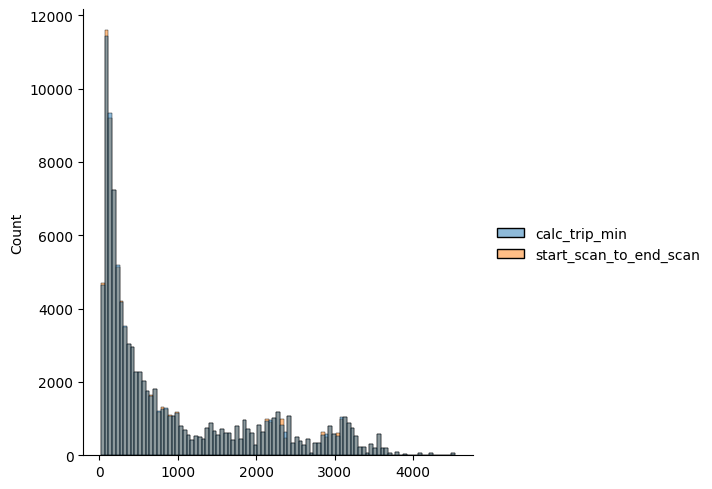

In [432]:
sns.displot(data_temp)

Ans 3.2<br>
our calculated time and start_scan_to_end_scan have same distribution
           <br>3.3)Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [433]:
agg_dict={'actual_time' : 'mean',
    'osrm_time' : 'mean',
          'segment_actual_time':'mean'
         }

In [434]:
data_temp=data.groupby("trip_uuid").agg(agg_dict).reset_index()
data_temp.head()

,trip_uuid,actual_time,osrm_time,segment_actual_time
0,trip-153671041653548748,402.102564,199.666667,39.692308
1,trip-153671042288605164,44.333333,23.333333,15.666667
2,trip-153671043369099517,1260.955056,738.966292,37.168539
3,trip-153671046011330457,41.000000,12.000000,29.500000
4,trip-153671052974046625,79.428571,29.571429,48.571429


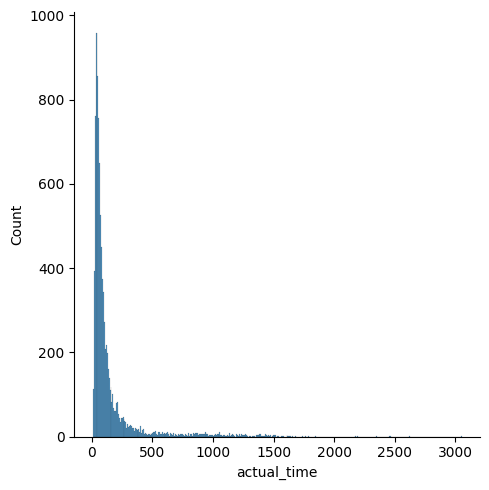

In [435]:
sns.displot(data_temp["actual_time"])

<Axes: xlabel='osrm_time', ylabel='Density'>

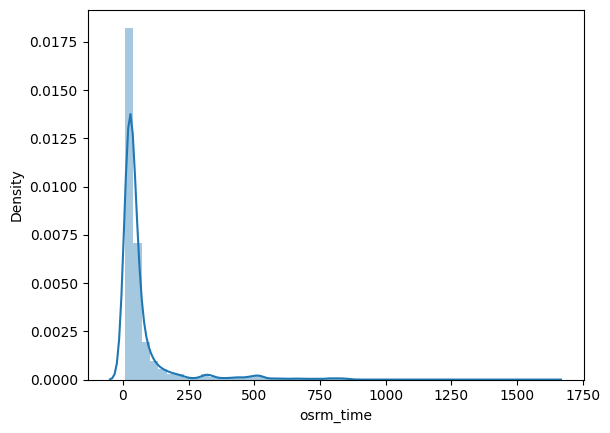

In [436]:
sns.distplot(data_temp["osrm_time"])

In [437]:
def null(p,alpha=0.05):
    if p<alpha:
        print("Reject")
    else:
        print("Failed to Reject")

In [438]:
# since distribution is looking different we will perform hypothesis using kstest
from scipy import stats
stats.kstest(data_temp["actual_time"],data_temp["osrm_time"])

KstestResult(statistic=0.4258749881437921, pvalue=0.0, statistic_location=41.96296296296296, statistic_sign=-1)

In [439]:
null(9.08)

Failed to Reject


failed to reject NULL hypothesiss that means actual time and osrm time<br>
osrm time is not that accurate
<br>
3.4)Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [440]:
agg_dict={'actual_time' : 'sum',
          'segment_actual_time':'sum'
         }

In [441]:
data_temp=data.groupby("trip_uuid").agg(agg_dict).reset_index()
data_temp.head()

,trip_uuid,actual_time,segment_actual_time
0,trip-153671041653548748,15682.0,1548.0
1,trip-153671042288605164,399.0,141.0
2,trip-153671043369099517,112225.0,3308.0
3,trip-153671046011330457,82.0,59.0
4,trip-153671052974046625,556.0,340.0


<Axes: xlabel='actual_time', ylabel='Density'>

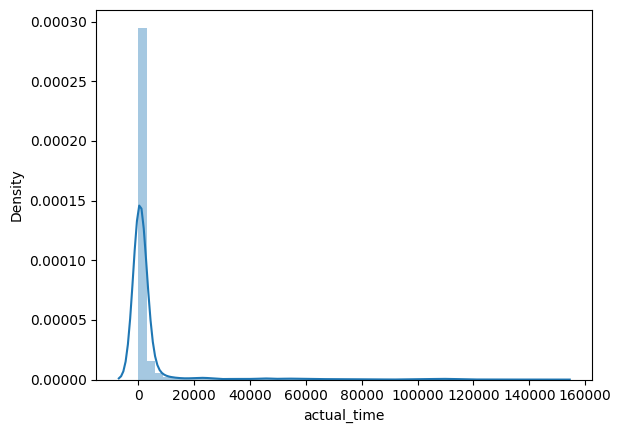

In [442]:
sns.distplot(data_temp["actual_time"])

<Axes: xlabel='segment_actual_time', ylabel='Density'>

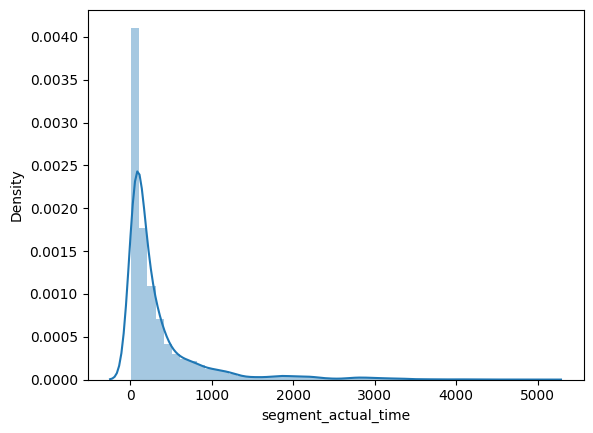

In [443]:
sns.distplot(data_temp['segment_actual_time'])

In [444]:
#we will perform kstest to check distribution
stats.kstest(data_temp['actual_time'],data_temp['segment_actual_time'])

KstestResult(statistic=0.24622972588447306, pvalue=5.505882303222428e-282, statistic_location=364.0, statistic_sign=-1)

In [445]:
null(5.505)

Failed to Reject


Since failed to reject null hypothesis actual_time and segemnt actual time have different distribution
3.5)Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [446]:
agg_dict={'osrm_distance' : 'sum',
          'segment_osrm_distance':'sum'
         }
data_temp=data.groupby("trip_uuid").agg(agg_dict).reset_index()
data_temp.head()

,trip_uuid,osrm_distance,segment_osrm_distance
0,trip-153671041653548748,10577.7647,1320.4733
1,trip-153671042288605164,269.4308,84.1894
2,trip-153671043369099517,89447.2488,2545.2678
3,trip-153671046011330457,31.6475,19.8766
4,trip-153671052974046625,266.2914,146.7919


<Axes: xlabel='osrm_distance', ylabel='Density'>

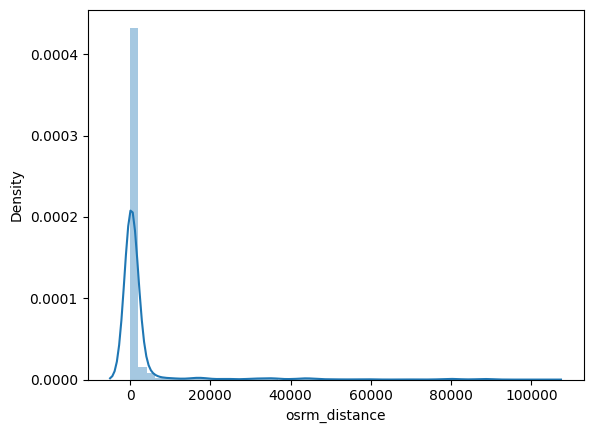

In [447]:
sns.distplot(data_temp["osrm_distance"])

<Axes: xlabel='segment_osrm_distance', ylabel='Density'>

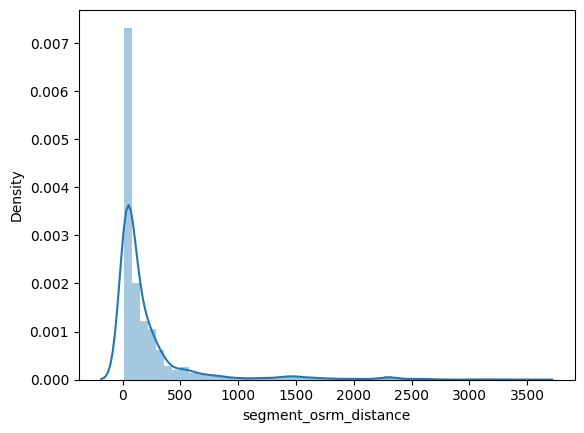

In [448]:
sns.distplot(data_temp["segment_osrm_distance"])

In [449]:
#lets check if ditribution is common
stats.kstest(data_temp["segment_osrm_distance"],data_temp["osrm_distance"])

KstestResult(statistic=0.25324860096746654, pvalue=1.648372424175136e-298, statistic_location=57.490899999999996, statistic_sign=1)

In [450]:
null(1.64)

Failed to Reject


Since we failed to reject null hypothesis data_temp["segment_osrm_distance"] ,data_temp["osrm_distance"] have different distribution <br>
3.6)Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [451]:
agg_dict={'osrm_time' : 'sum',
          'segment_osrm_time':'sum'
         }
data_temp=data.groupby("trip_uuid").agg(agg_dict).reset_index()
data_temp.head()

,trip_uuid,osrm_time,segment_osrm_time
0,trip-153671041653548748,7787.0,1008.0
1,trip-153671042288605164,210.0,65.0
2,trip-153671043369099517,65768.0,1941.0
3,trip-153671046011330457,24.0,16.0
4,trip-153671052974046625,207.0,115.0


<Axes: xlabel='osrm_time', ylabel='Density'>

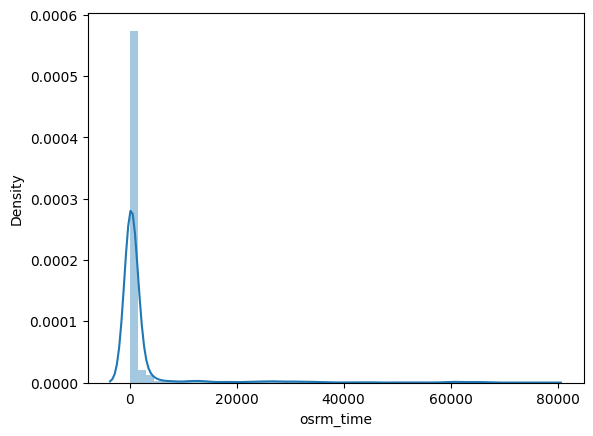

In [452]:
sns.distplot(data_temp["osrm_time"])

<Axes: xlabel='segment_osrm_time', ylabel='Density'>

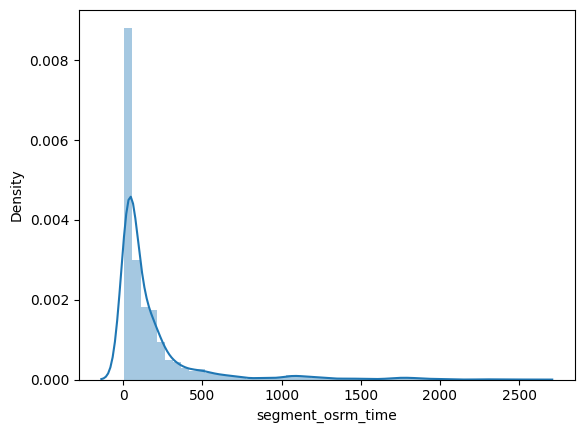

In [453]:
sns.distplot(data_temp["segment_osrm_time"])

In [454]:
stats.kstest(data_temp["osrm_time"],data_temp["segment_osrm_time"])

KstestResult(statistic=0.2448069809352177, pvalue=1.0723285810790806e-278, statistic_location=196.0, statistic_sign=-1)

In [455]:
null(1.07)

Failed to Reject


since Failed to reject null hypothesis we can say both distributions are different.


<Axes: >

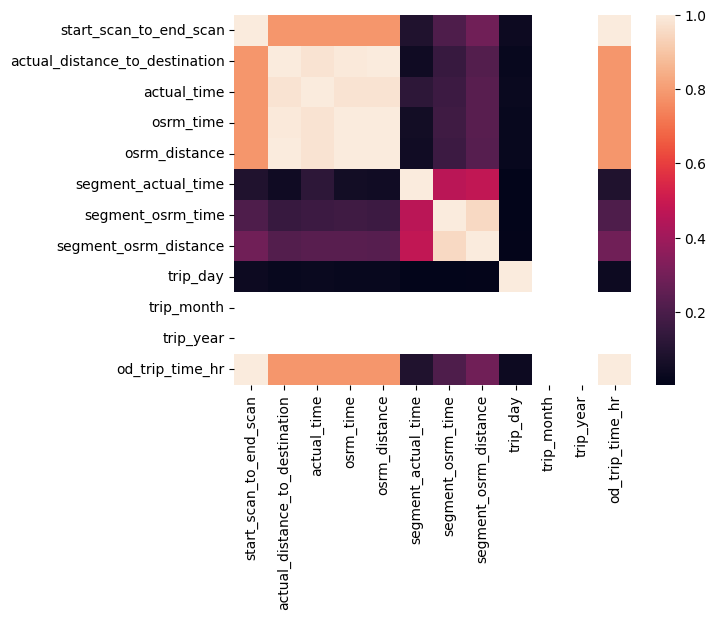

In [456]:
#lets perform heatmap analysis
sns.heatmap(data.corr())

In [457]:
#we conclue that columns are highly corelated  actual time and osrm time are corelated 

In [458]:
data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 103654 entries, 0 to 143473
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            103654 non-null  object        
 1   trip_creation_time              103654 non-null  datetime64[ns]
 2   route_schedule_uuid             103654 non-null  object        
 3   route_type                      103654 non-null  object        
 4   trip_uuid                       103654 non-null  object        
 5   source_center                   103654 non-null  object        
 6   source_name                     103654 non-null  object        
 7   destination_center              103654 non-null  object        
 8   destination_name                103654 non-null  object        
 9   od_start_time                   103654 non-null  datetime64[ns]
 10  od_end_time                     103654 non-null  datetim

In [459]:
to_drop=["trip_creation_time","destination_name","source_name"]

In [460]:
data=data.drop(to_drop,axis=1)

In [461]:
data=pd.get_dummies(data,columns = ["route_type"])

In [462]:
data.head()

,data,route_schedule_uuid,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_state_center,destination_state,destination_state_center,dst_city,dst_place,dst_code,src_city,src_place,src_code,trip_day,trip_month,trip_year,od_trip_time_hr,route_type_Carting,route_type_FTL
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,Gujarat,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Khambhat,MotvdDPP,D,Anand,VUNagar,DC,20,9,2018,86.213637,1,0
1,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,Gujarat,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Khambhat,MotvdDPP,D,Anand,VUNagar,DC,20,9,2018,86.213637,1,0
2,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,Gujarat,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Khambhat,MotvdDPP,D,Anand,VUNagar,DC,20,9,2018,86.213637,1,0
3,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,Gujarat,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Khambhat,MotvdDPP,D,Anand,VUNagar,DC,20,9,2018,86.213637,1,0
4,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,Gujarat,Anand_VUNagar_DC,Gujarat,Khambhat_MotvdDPP_D,Khambhat,MotvdDPP,D,Anand,VUNagar,DC,20,9,2018,86.213637,1,0
